In [1]:
import numpy as np
import pandas as pd

### Series

In [2]:
tmp = [20, 35, 37]
s1 = pd.Series(tmp)
s1

0    20
1    35
2    37
dtype: int64

In [3]:
print(type(s1))
print(s1.dtype)
print(s1.shape)

<class 'pandas.core.series.Series'>
int64
(3,)


In [4]:
s1.values

array([20, 35, 37], dtype=int64)

In [5]:
s1[0], s1[2]

(20, 37)

In [6]:
s2 = pd.Series({'city 1':20, 'city 2':35, 'city 3':37, 'city 4':30})
s2 = pd.Series([20, 35, 37], index=['city_1', 'city_2', 'city_3'])
s2

city_1    20
city_2    35
city_3    37
dtype: int64

In [7]:
s2['city_3']

37

In [8]:
s2[['city_1','city_3']]

city_1    20
city_3    37
dtype: int64

In [9]:
s2['city_1':'city_3']

city_1    20
city_2    35
city_3    37
dtype: int64

In [10]:
s2.mean()

30.666666666666668

Conditional selection/Filtering

In [11]:
s2>30

city_1    False
city_2     True
city_3     True
dtype: bool

In [12]:
s2[s2>30]

city_2    35
city_3    37
dtype: int64

In [13]:
s2[s2>s2.mean()]

city_2    35
city_3    37
dtype: int64

In [14]:
s2[s2<=30] = 40
s2

city_1    40
city_2    35
city_3    37
dtype: int64

### Dataframe

In [15]:
arr = [2,3,5,6]
df1 = pd.DataFrame(arr)
df1

,0
0,2
1,3
2,5
3,6


In [16]:
arr2 = [[25,'S'], [15,'C'], [20,'R']]
df2 = pd.DataFrame(arr2, columns=['temp', 'event'])
df2

,temp,event
0,25,S
1,15,C
2,20,R


__Dictionaries to df__

In [17]:
arr = {"brand" : ["Ford", "Tesla", "Volvo"], 
        "HeadQ" : ["Michigan","Texas","Gothenburg"]
      }
brands = pd.DataFrame(arr)
brands

,brand,HeadQ
0,Ford,Michigan
1,Tesla,Texas
2,Volvo,Gothenburg


In [18]:
brands.columns

Index(['brand', 'HeadQ'], dtype='object')

In [19]:
brands.index = ['b_1','b_2','b_3']
brands

,brand,HeadQ
b_1,Ford,Michigan
b_2,Tesla,Texas
b_3,Volvo,Gothenburg


In [20]:
df = pd.DataFrame({
    'day':         ['1/1/2022','2/1/2022','3/1/2022','4/1/2022','5/1/2022','6/1/2022'],
    'temperature': [30,33,37,21,30,31],
    'windspeed':   [5,7,8,9,10,8],
    'event':       ['Sunny','Sunny','Hot','Snow','Rain','Sunny']
})

In [21]:
df

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain
5,6/1/2022,31,8,Sunny


__Analyzing DF__

In [22]:
print(df.dtypes)
print(df.shape)

day            object
temperature     int64
windspeed       int64
event          object
dtype: object
(6, 4)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          6 non-null      object
 1   temperature  6 non-null      int64 
 2   windspeed    6 non-null      int64 
 3   event        6 non-null      object
dtypes: int64(2), object(2)
memory usage: 320.0+ bytes


In [24]:
df.describe()

,temperature,windspeed
count,6.000000,6.000000
mean,30.333333,7.833333
std,5.278889,1.722401
min,21.000000,5.000000
25%,30.000000,7.250000
50%,30.500000,8.000000
75%,32.500000,8.750000
max,37.000000,10.000000


In [25]:
df.event.value_counts()

Sunny    3
Hot      1
Snow     1
Rain     1
Name: event, dtype: int64

In [26]:
df.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [27]:
df['event'].unique()

array(['Sunny', 'Hot', 'Snow', 'Rain'], dtype=object)

In [28]:
type(df)

pandas.core.frame.DataFrame

In [29]:
type(df['day'])

pandas.core.series.Series

__Set\_index__

In [30]:
df.head()

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain


In [31]:
df1 = df.copy()

In [32]:
df1['day'] = pd.to_datetime(df1['day'])
df1

,day,temperature,windspeed,event
0,2022-01-01,30,5,Sunny
1,2022-02-01,33,7,Sunny
2,2022-03-01,37,8,Hot
3,2022-04-01,21,9,Snow
4,2022-05-01,30,10,Rain
5,2022-06-01,31,8,Sunny


In [33]:
df1.set_index('day', inplace=True)
df1

,temperature,windspeed,event
day,,,
2022-01-01,30,5,Sunny
2022-02-01,33,7,Sunny
2022-03-01,37,8,Hot
2022-04-01,21,9,Snow
2022-05-01,30,10,Rain
2022-06-01,31,8,Sunny


In [34]:
df1.loc[['2/1/2022']]

,temperature,windspeed,event
day,,,
2022-02-01,33,7,Sunny


In [35]:
df1.iloc[[1]]

,temperature,windspeed,event
day,,,
2022-02-01,33,7,Sunny


In [36]:
df1.reset_index(inplace=True)
df1

,day,temperature,windspeed,event
0,2022-01-01,30,5,Sunny
1,2022-02-01,33,7,Sunny
2,2022-03-01,37,8,Hot
3,2022-04-01,21,9,Snow
4,2022-05-01,30,10,Rain
5,2022-06-01,31,8,Sunny


__Renaming column__

In [37]:
df1.columns

Index(['day', 'temperature', 'windspeed', 'event'], dtype='object')

In [38]:
df1.columns = ['date','temp.','wind','event']
df1

,date,temp.,wind,event
0,2022-01-01,30,5,Sunny
1,2022-02-01,33,7,Sunny
2,2022-03-01,37,8,Hot
3,2022-04-01,21,9,Snow
4,2022-05-01,30,10,Rain
5,2022-06-01,31,8,Sunny


In [39]:
df1.rename(columns={'temp.' : 'temperature', 'wind' : 'wind speed'})

,date,temperature,wind speed,event
0,2022-01-01,30,5,Sunny
1,2022-02-01,33,7,Sunny
2,2022-03-01,37,8,Hot
3,2022-04-01,21,9,Snow
4,2022-05-01,30,10,Rain
5,2022-06-01,31,8,Sunny


In [40]:
df1.columns = df.columns.str.replace(' ', '_')
df1

,day,temperature,windspeed,event
0,2022-01-01,30,5,Sunny
1,2022-02-01,33,7,Sunny
2,2022-03-01,37,8,Hot
3,2022-04-01,21,9,Snow
4,2022-05-01,30,10,Rain
5,2022-06-01,31,8,Sunny


__Indexing/slicing__

In [41]:
df

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain
5,6/1/2022,31,8,Sunny


In [42]:
df['temperature']

0    30
1    33
2    37
3    21
4    30
5    31
Name: temperature, dtype: int64

In [43]:
df.temperature

0    30
1    33
2    37
3    21
4    30
5    31
Name: temperature, dtype: int64

In [44]:
df[['temperature','windspeed']]

,temperature,windspeed
0,30,5
1,33,7
2,37,8
3,21,9
4,30,10
5,31,8


In [45]:
df['temperature'][3]

21

In [46]:
df.at[3, 'temperature']

21

In [47]:
df[2:5]  # 2 to 4

,day,temperature,windspeed,event
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain


__loc & iloc__

In [48]:
df1 = df.copy()
df1.set_index('day', inplace=True)
df1

,temperature,windspeed,event
day,,,
1/1/2022,30,5,Sunny
2/1/2022,33,7,Sunny
3/1/2022,37,8,Hot
4/1/2022,21,9,Snow
5/1/2022,30,10,Rain
6/1/2022,31,8,Sunny


In [49]:
df1.loc['2/1/2022']

temperature       33
windspeed          7
event          Sunny
Name: 2/1/2022, dtype: object

In [50]:
df1.loc['2/1/2022','temperature'] 

33

In [51]:
df1.loc['2/1/2022':'4/1/2022']

,temperature,windspeed,event
day,,,
2/1/2022,33,7,Sunny
3/1/2022,37,8,Hot
4/1/2022,21,9,Snow


In [52]:
df1.loc['2/1/2022':'4/1/2022',['temperature']]

,temperature
day,
2/1/2022,33
3/1/2022,37
4/1/2022,21


In [53]:
df1.loc['2/1/2022':'4/1/2022', ['temperature','event']] 

,temperature,event
day,,
2/1/2022,33,Sunny
3/1/2022,37,Hot
4/1/2022,21,Snow


In [54]:
df.iloc[1]

day            2/1/2022
temperature          33
windspeed             7
event             Sunny
Name: 1, dtype: object

In [55]:
df.iloc[[0,-1]]

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
5,6/1/2022,31,8,Sunny


In [56]:
df.iloc[1:4]

,day,temperature,windspeed,event
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow


In [57]:
df.iloc[:3]

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot


In [58]:
df.iloc[1, 1]

33

In [59]:
df.iloc[[0, 1], [0, 1]]

,day,temperature
0,1/1/2022,30
1,2/1/2022,33


In [60]:
df.iloc[:,[1]]

,temperature
0,30
1,33
2,37
3,21
4,30
5,31


In [61]:
df.iloc[0:3, 0:2]

,day,temperature
0,1/1/2022,30
1,2/1/2022,33
2,3/1/2022,37


__Statistics__

In [62]:
df['temperature'].mean()

30.333333333333332

In [63]:
df['temperature'].std()

5.278888771954441

In [64]:
len(df[df['event']=='Sunny'])

3

In [65]:
df.value_counts()

day       temperature  windspeed  event
1/1/2022  30           5          Sunny    1
2/1/2022  33           7          Sunny    1
3/1/2022  37           8          Hot      1
4/1/2022  21           9          Snow     1
5/1/2022  30           10         Rain     1
6/1/2022  31           8          Sunny    1
dtype: int64

In [66]:
df['event'].value_counts()

Sunny    3
Hot      1
Snow     1
Rain     1
Name: event, dtype: int64

__Conditional selection/Filtering__

In [67]:
df

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain
5,6/1/2022,31,8,Sunny


In [68]:
df['temperature'].max()

37

In [69]:
df['temperature'].min()

21

In [70]:
df['temperature']>30

0    False
1     True
2     True
3    False
4    False
5     True
Name: temperature, dtype: bool

In [71]:
df[df['temperature']>30]

,day,temperature,windspeed,event
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
5,6/1/2022,31,8,Sunny


In [72]:
df.loc[df['temperature']>30]

,day,temperature,windspeed,event
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
5,6/1/2022,31,8,Sunny


In [73]:
df.loc[df['temperature']>30, ['event']]

,event
1,Sunny
2,Hot
5,Sunny


In [74]:
df[df['event']=='Rain']

,day,temperature,windspeed,event
4,5/1/2022,30,10,Rain


In [75]:
df[~(df['event']=='Rain')]

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
5,6/1/2022,31,8,Sunny


In [76]:
df[(df['event']=='Rain') | (df['event']=='Snow')]

,day,temperature,windspeed,event
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain


In [77]:
df.loc[df['event'].isin(['Hot','Snow','Rain'])]

,day,temperature,windspeed,event
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain


In [78]:
df['day'][df['event']=='Rain']   #find day when event was rain

4    5/1/2022
Name: day, dtype: object

In [79]:
df[df['temperature']==df['temperature'].max()]

,day,temperature,windspeed,event
2,3/1/2022,37,8,Hot


In [80]:
#find day when temperature was max
df['day'][df['temperature'] == df['temperature'].max()]

2    3/1/2022
Name: day, dtype: object

In [81]:
df[(df['temperature']>=30) & (df['event']=='Rain')]

,day,temperature,windspeed,event
4,5/1/2022,30,10,Rain


In [82]:
filt = (df['temperature']>=30) & (df['event']=='Rain')
df[~filt]

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
2,3/1/2022,37,8,Hot
3,4/1/2022,21,9,Snow
5,6/1/2022,31,8,Sunny


In [83]:
df['temperature'] - df['temperature'].mean()

0   -0.333333
1    2.666667
2    6.666667
3   -9.333333
4   -0.333333
5    0.666667
Name: temperature, dtype: float64

In [84]:
ev = ['Rain', 'Sunny']
filt = df['event'].isin(ev)
df.loc[filt]

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
4,5/1/2022,30,10,Rain
5,6/1/2022,31,8,Sunny


In [85]:
filt = df['event'].str.contains('Sunny')
df.loc[filt]

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
5,6/1/2022,31,8,Sunny


In [86]:
df['event'].str.contains('Sunny').sum()

3

In [87]:
df['event'].map(lambda A: A.upper())

0    SUNNY
1    SUNNY
2      HOT
3     SNOW
4     RAIN
5    SUNNY
Name: event, dtype: object

__Drop__

In [88]:
df.drop(2)

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
3,4/1/2022,21,9,Snow
4,5/1/2022,30,10,Rain
5,6/1/2022,31,8,Sunny


In [89]:
df.drop([2, 4])

,day,temperature,windspeed,event
0,1/1/2022,30,5,Sunny
1,2/1/2022,33,7,Sunny
3,4/1/2022,21,9,Snow
5,6/1/2022,31,8,Sunny


In [90]:
df.drop('temperature', axis=1)

,day,windspeed,event
0,1/1/2022,5,Sunny
1,2/1/2022,7,Sunny
2,3/1/2022,8,Hot
3,4/1/2022,9,Snow
4,5/1/2022,10,Rain
5,6/1/2022,8,Sunny


In [91]:
df.drop(['temperature','windspeed'], axis=1)

,day,event
0,1/1/2022,Sunny
1,2/1/2022,Sunny
2,3/1/2022,Hot
3,4/1/2022,Snow
4,5/1/2022,Rain
5,6/1/2022,Sunny


In [92]:
df.drop(columns=['temperature','windspeed'])

,day,event
0,1/1/2022,Sunny
1,2/1/2022,Sunny
2,3/1/2022,Hot
3,4/1/2022,Snow
4,5/1/2022,Rain
5,6/1/2022,Sunny


__Update Column__

In [93]:
#Add column
humidity = pd.Series([68,55,56,56], index=['day_1','day_2','day_4','day_5'])
humidity

day_1    68
day_2    55
day_4    56
day_5    56
dtype: int64

In [94]:
df['humidity'] = humidity
df

,day,temperature,windspeed,event,humidity
0,1/1/2022,30,5,Sunny,NaN
1,2/1/2022,33,7,Sunny,NaN
2,3/1/2022,37,8,Hot,NaN
3,4/1/2022,21,9,Snow,NaN
4,5/1/2022,30,10,Rain,NaN
5,6/1/2022,31,8,Sunny,NaN


In [95]:
#Add/Remove Rows and Columns

arr = {"first_name": ["Richard", "Mel", "Rick"], 
       "last_name" : ["Roe","Trotter","Roe"],
       "email"     : ["richard@gmail.com", "mel@gmail.com", "rick@gmail.com"]}

df2 = pd.DataFrame(arr)
df2

,first_name,last_name,email
0,Richard,Roe,richard@gmail.com
1,Mel,Trotter,mel@gmail.com
2,Rick,Roe,rick@gmail.com


In [96]:
df2['full_name'] = df2['first_name']+' '+df2['last_name']
df2

,first_name,last_name,email,full_name
0,Richard,Roe,richard@gmail.com,Richard Roe
1,Mel,Trotter,mel@gmail.com,Mel Trotter
2,Rick,Roe,rick@gmail.com,Rick Roe


In [97]:
df2.drop(columns=['first_name','last_name'], inplace=True)
df2

,email,full_name
0,richard@gmail.com,Richard Roe
1,mel@gmail.com,Mel Trotter
2,rick@gmail.com,Rick Roe


In [98]:
df2['full_name'].str.split(' ', expand=True)

,0,1
0,Richard,Roe
1,Mel,Trotter
2,Rick,Roe


In [99]:
df2[['first_name','last_name']] = df2.full_name.str.split(' ', expand=True)
df2

,email,full_name,first_name,last_name
0,richard@gmail.com,Richard Roe,Richard,Roe
1,mel@gmail.com,Mel Trotter,Mel,Trotter
2,rick@gmail.com,Rick Roe,Rick,Roe


In [100]:
df2.drop(['full_name'], axis=1, inplace=True)
df2

,email,first_name,last_name
0,richard@gmail.com,Richard,Roe
1,mel@gmail.com,Mel,Trotter
2,rick@gmail.com,Rick,Roe


__Update Row__

In [101]:
df2.loc[2] = ['Rick','Snyder','ricksnyder@gmail.com']
df2

,email,first_name,last_name
0,richard@gmail.com,Richard,Roe
1,mel@gmail.com,Mel,Trotter
2,Rick,Snyder,ricksnyder@gmail.com


In [102]:
df2.loc[2, ['last_name','email']] = ['Roe','rickroe@gmail.com']
df2

,email,first_name,last_name
0,richard@gmail.com,Richard,Roe
1,mel@gmail.com,Mel,Trotter
2,rickroe@gmail.com,Snyder,Roe


In [103]:
filt = df2['last_name']=='Roe'
df2.loc[filt,'email']='roe@gmail.com'
df2

,email,first_name,last_name
0,roe@gmail.com,Richard,Roe
1,mel@gmail.com,Mel,Trotter
2,roe@gmail.com,Snyder,Roe


In [104]:
df2['email'].apply(len)

0    13
1    13
2    13
Name: email, dtype: int64

In [105]:
df2['email'].apply(lambda x : x.upper())

0    ROE@GMAIL.COM
1    MEL@GMAIL.COM
2    ROE@GMAIL.COM
Name: email, dtype: object

__Sorting__

In [106]:
df2.sort_values(by='last_name')

,email,first_name,last_name
0,roe@gmail.com,Richard,Roe
2,roe@gmail.com,Snyder,Roe
1,mel@gmail.com,Mel,Trotter


In [107]:
df2.sort_values(by=['last_name','first_name'])

,email,first_name,last_name
0,roe@gmail.com,Richard,Roe
2,roe@gmail.com,Snyder,Roe
1,mel@gmail.com,Mel,Trotter


__Concate__

In [108]:
p1 = {"name": ["Ralph", "Mel", "Harry"],
      "email": ["richard@mail", "mel@mail", "harry@mail"]}

d1 = pd.DataFrame(p1)

p2 = {"name": ["Carla", "Frank"],
      "email": ["carla@mail", "frank@mail"]}

d2 = pd.DataFrame(p2)
pd.concat([d1, d2])

,name,email
0,Ralph,richard@mail
1,Mel,mel@mail
2,Harry,harry@mail
0,Carla,carla@mail
1,Frank,frank@mail


In [109]:
pd.concat([d1, d2], ignore_index=True)

,name,email
0,Ralph,richard@mail
1,Mel,mel@mail
2,Harry,harry@mail
3,Carla,carla@mail
4,Frank,frank@mail


In [110]:
df5 = pd.concat([d1, d2], keys=['class1', 'class2'])
df5

name         email
class1 0  Ralph  richard@mail
       1    Mel      mel@mail
       2  Harry    harry@mail
class2 0  Carla    carla@mail
       1  Frank    frank@mail

In [111]:
df5.loc['class1']

,name,email
0,Ralph,richard@mail
1,Mel,mel@mail
2,Harry,harry@mail


In [112]:
c11 = {"age": [25, 34, 32]}
d_new = pd.DataFrame(c11)
pd.concat([d1, d_new])

,name,email,age
0,Ralph,richard@mail,NaN
1,Mel,mel@mail,NaN
2,Harry,harry@mail,NaN
0,NaN,NaN,25.0
1,NaN,NaN,34.0
2,NaN,NaN,32.0


In [113]:
pd.concat([d1, d_new], axis=1)

,name,email,age
0,Ralph,richard@mail,25
1,Mel,mel@mail,34
2,Harry,harry@mail,32


__Merge__

In [114]:
c1 = {"name": ["Ralph","Mel","Harry","Grace"],
      "email": ["ralph@mail","mel@mail","harry@mail","grace@mail"]
     }
d1 = pd.DataFrame(c1)

c1_age = {"name": ["Harry","Mel","Ralph","Roger"],
          "age": [23,24,25,30]
         }
d2 = pd.DataFrame(c1_age)

In [115]:
pd.merge(d1, d2)

,name,email,age
0,Ralph,ralph@mail,25
1,Mel,mel@mail,24
2,Harry,harry@mail,23


In [116]:
#inner join
pd.merge(d1, d2, on='name')

,name,email,age
0,Ralph,ralph@mail,25
1,Mel,mel@mail,24
2,Harry,harry@mail,23


In [117]:
#outer join
pd.merge(d1, d2, on='name', how='outer')

,name,email,age
0,Ralph,ralph@mail,25.0
1,Mel,mel@mail,24.0
2,Harry,harry@mail,23.0
3,Grace,grace@mail,NaN
4,Roger,NaN,30.0


In [118]:
#outer join
pd.merge(d1, d2, on='name', how='outer', indicator=True)

,name,email,age,_merge
0,Ralph,ralph@mail,25.0,both
1,Mel,mel@mail,24.0,both
2,Harry,harry@mail,23.0,both
3,Grace,grace@mail,NaN,left_only
4,Roger,NaN,30.0,right_only


In [119]:
#left join
pd.merge(d1, d2, on='name', how='left')

,name,email,age
0,Ralph,ralph@mail,25.0
1,Mel,mel@mail,24.0
2,Harry,harry@mail,23.0
3,Grace,grace@mail,NaN


__Group By__

In [120]:
df_g = pd.read_csv('weather_c.csv')
df_g.head()

,day,city,temp,windspeed,event
0,1/1/2022,city_1,23,6,Snow
1,1/2/2022,city_1,26,7,Sunny
2,1/3/2022,city_1,29,2,Rain
3,1/4/2022,city_1,37,2,Rain
4,1/1/2022,city_2,22,2,Snow


In [121]:
city_g = df_g.groupby('city')

In [122]:
city_g.get_group('city_2')

,day,city,temp,windspeed,event
4,1/1/2022,city_2,22,2,Snow
5,1/2/2022,city_2,24,4,Sunny
6,1/3/2022,city_2,27,5,Sunny
7,1/4/2022,city_2,29,6,Sunny


In [123]:
for city, city_df in city_g:
    print(city)
    print(city_df)

city_1
        day    city  temp  windspeed  event
0  1/1/2022  city_1    23          6   Snow
1  1/2/2022  city_1    26          7  Sunny
2  1/3/2022  city_1    29          2   Rain
3  1/4/2022  city_1    37          2   Rain
city_2
        day    city  temp  windspeed  event
4  1/1/2022  city_2    22          2   Snow
5  1/2/2022  city_2    24          4  Sunny
6  1/3/2022  city_2    27          5  Sunny
7  1/4/2022  city_2    29          6  Sunny
city_3
         day    city  temp  windspeed event
8   1/1/2022  city_3    24          3  Snow
9   1/2/2022  city_3    22          4  Snow
10  1/3/2022  city_3    21          2  Snow
11  1/4/2022  city_3    27          6  Rain


In [124]:
city_g.mean(numeric_only=True)

,temp,windspeed
city,,
city_1,28.75,4.25
city_2,25.50,4.25
city_3,23.50,3.75


In [125]:
city_g['temp'].agg(['mean', 'median'])

,mean,median
city,,
city_1,28.75,27.5
city_2,25.50,25.5
city_3,23.50,23.0


In [126]:
city_g['event'].value_counts()

city    event
city_1  Rain     2
        Snow     1
        Sunny    1
city_2  Sunny    3
        Snow     1
city_3  Snow     3
        Rain     1
Name: event, dtype: int64

In [127]:
city_g['event'].value_counts(normalize=True).loc['city_2']

event
Sunny    0.75
Snow     0.25
Name: event, dtype: float64

__Correlation / Dependence__

In [128]:
data = {'name':   ['John', 'joe', 'david','rob','lana'], 
        'age':    [15,14,11,12,13],
        'height': [170,163,143,149,156], 
        'weight': [56,50,35,45,46]}

df_c = pd.DataFrame(data)
df_c.corr(numeric_only=True)

,age,height,weight
age,1.000000,0.999568,0.965029
height,0.999568,1.000000,0.958576
weight,0.965029,0.958576,1.000000


In [129]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                    header=None, names=['sepal_length','sepal_width','petal_length','petal_width','species'])

iris.corr(numeric_only=True)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


__Pivot table__

In [130]:
df_p = pd.read_csv('weather_c.csv', usecols=[0,1,2,3])
df_p.head()

,day,city,temp,windspeed
0,1/1/2022,city_1,23,6
1,1/2/2022,city_1,26,7
2,1/3/2022,city_1,29,2
3,1/4/2022,city_1,37,2
4,1/1/2022,city_2,22,2


In [131]:
df_p.pivot(index='day',columns='city')

temp               windspeed              
city     city_1 city_2 city_3    city_1 city_2 city_3
day                                                  
1/1/2022     23     22     24         6      2      3
1/2/2022     26     24     22         7      4      4
1/3/2022     29     27     21         2      5      2
1/4/2022     37     29     27         2      6      6

In [132]:
df_p.pivot(index='city',columns='day')

temp                            windspeed                    \
day    1/1/2022 1/2/2022 1/3/2022 1/4/2022  1/1/2022 1/2/2022 1/3/2022   
city                                                                     
city_1       23       26       29       37         6        7        2   
city_2       22       24       27       29         2        4        5   
city_3       24       22       21       27         3        4        2   

                 
day    1/4/2022  
city             
city_1        2  
city_2        6  
city_3        6

In [133]:
weather4 = {'day':         ['5/1/2022','5/1/2022','5/2/2022','5/2/2022','5/1/2022','5/1/2022','5/2/2022','5/2/2022'],
            'city':        ['dhaka', 'dhaka', 'dhaka','dhaka','khulna','khulna','khulna','khulna'],
            'temperature': [22,25,30,32,21,20,38,37],
            'windspeed':   [5,4,6,6,7,7,5,4]
           }

df4 = pd.DataFrame(weather4)
df4

,day,city,temperature,windspeed
0,5/1/2022,dhaka,22,5
1,5/1/2022,dhaka,25,4
2,5/2/2022,dhaka,30,6
3,5/2/2022,dhaka,32,6
4,5/1/2022,khulna,21,7
5,5/1/2022,khulna,20,7
6,5/2/2022,khulna,38,5
7,5/2/2022,khulna,37,4


In [134]:
df4.pivot_table(index='city',columns='day')

temperature          windspeed         
day       5/1/2022 5/2/2022  5/1/2022 5/2/2022
city                                          
dhaka         23.5     31.0       4.5      6.0
khulna        20.5     37.5       7.0      4.5

__Melt/Reshape__

In [135]:
weather5 = {'day':    ['1/1/2022','1/2/2022','1/3/2022'],
            'dhaka':  [25,28,32],
            'khulna': [26,30,35],
            'sylhet': [22,25,30]}

df5 = pd.DataFrame(weather5)
df5

,day,dhaka,khulna,sylhet
0,1/1/2022,25,26,22
1,1/2/2022,28,30,25
2,1/3/2022,32,35,30


In [136]:
pd.melt(df5,id_vars=['day'])

,day,variable,value
0,1/1/2022,dhaka,25
1,1/2/2022,dhaka,28
2,1/3/2022,dhaka,32
3,1/1/2022,khulna,26
4,1/2/2022,khulna,30
5,1/3/2022,khulna,35
6,1/1/2022,sylhet,22
7,1/2/2022,sylhet,25
8,1/3/2022,sylhet,30


__Read csv file__

In [137]:
pd.read_csv('weather.csv')

,1/1/2022,32,6,Rain
0,1/2/2022,35,7,Sunny
1,1/3/2022,28,2,Snow
2,1/4/2022,24,7,Snow
3,1/5/2022,32,4,Rain
4,1/6/2022,31,2,Sunny


In [138]:
pd.read_csv('weather.csv', header=None)

,0,1,2,3
0,1/1/2022,32,6,Rain
1,1/2/2022,35,7,Sunny
2,1/3/2022,28,2,Snow
3,1/4/2022,24,7,Snow
4,1/5/2022,32,4,Rain
5,1/6/2022,31,2,Sunny


In [139]:
dfc = pd.read_csv('weather.csv', names=['day','temp','windspeed','event'])
dfc

,day,temp,windspeed,event
0,1/1/2022,32,6,Rain
1,1/2/2022,35,7,Sunny
2,1/3/2022,28,2,Snow
3,1/4/2022,24,7,Snow
4,1/5/2022,32,4,Rain
5,1/6/2022,31,2,Sunny


In [140]:
pd.read_csv('weather.csv', usecols=[0,1,3])

,1/1/2022,32,Rain
0,1/2/2022,35,Sunny
1,1/3/2022,28,Snow
2,1/4/2022,24,Snow
3,1/5/2022,32,Rain
4,1/6/2022,31,Sunny


In [141]:
dfc.dtypes

day          object
temp          int64
windspeed     int64
event        object
dtype: object

In [142]:
dfc['day'] = pd.to_datetime(dfc['day'])
dfc

,day,temp,windspeed,event
0,2022-01-01,32,6,Rain
1,2022-01-02,35,7,Sunny
2,2022-01-03,28,2,Snow
3,2022-01-04,24,7,Snow
4,2022-01-05,32,4,Rain
5,2022-01-06,31,2,Sunny


In [143]:
dfc.set_index('day', inplace=True)
dfc

,temp,windspeed,event
day,,,
2022-01-01,32,6,Rain
2022-01-02,35,7,Sunny
2022-01-03,28,2,Snow
2022-01-04,24,7,Snow
2022-01-05,32,4,Rain
2022-01-06,31,2,Sunny


In [144]:
pd.read_csv('weather.csv', header=None, names=['day','temp','windspeed','event'], index_col=0, parse_dates=True)

,temp,windspeed,event
day,,,
2022-01-01,32,6,Rain
2022-01-02,35,7,Sunny
2022-01-03,28,2,Snow
2022-01-04,24,7,Snow
2022-01-05,32,4,Rain
2022-01-06,31,2,Sunny


__Write csv file__

In [145]:
data1 = {"name": ["Ralph","Mel","Harry","Grace"],
         "email": ["ralph@mail","mel@mail","harry@mail","grace@mail"]}

dv = pd.DataFrame(data1)

In [146]:
dv.to_csv("data1.csv", index=False)

__Chart visualization__

In [147]:
df1

,temperature,windspeed,event
day,,,
1/1/2022,30,5,Sunny
2/1/2022,33,7,Sunny
3/1/2022,37,8,Hot
4/1/2022,21,9,Snow
5/1/2022,30,10,Rain
6/1/2022,31,8,Sunny


<AxesSubplot: xlabel='day'>

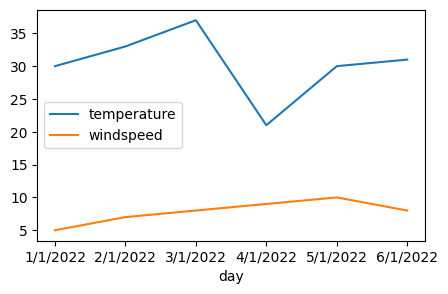

In [148]:
df1.plot(figsize=(5, 3))

<AxesSubplot: xlabel='day'>

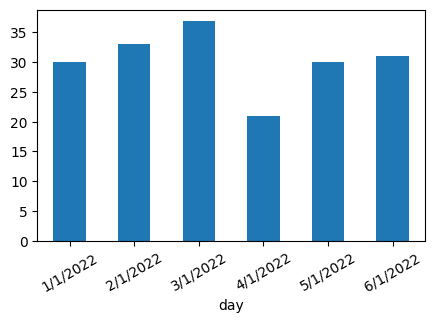

In [149]:
df1['temperature'].plot(kind="bar", figsize=(5, 3), rot=30)

<AxesSubplot: >

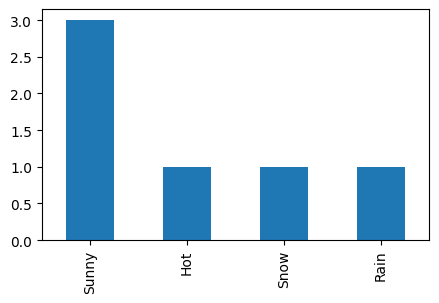

In [150]:
df1['event'].value_counts().plot(kind='bar', figsize=(5, 3))